<a href="https://colab.research.google.com/github/melinadwisafitri/mental-care/blob/machine-learning/Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import urllib.request
import json

import nltk
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
import string
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [30]:
data_url = 'https://raw.githubusercontent.com/melinadwisafitri/mental-care/machine-learning/dataset/data.json'
urllib.request.urlretrieve(data_url, 'data.json')

('data.json', <http.client.HTTPMessage at 0x7f9e0b21c9d0>)

In [31]:
with open('data.json', 'r') as f:
  data = json.load(f)

In [32]:
words=[]
classes = []
documents = []
ignore_letters = ['!', '?', ',', '.']
for data in data['mental_healths']:
    for question in data['question']:
        word = nltk.word_tokenize(question)
        words.extend(word)        
        documents.append((word, data['tag']))
        if data['tag'] not in classes:
          classes.append(data['tag'])
print(documents)

[(['hai'], 'salam_pembuka'), (['hallo'], 'salam_pembuka'), (['apa', 'kabar', '?'], 'salam_pembuka'), (['terimakasih'], 'salam_penutup'), (['sampai', 'ketemu', 'lagi'], 'salam_penutup'), (['Apa', 'itu', 'kesehatan', 'mental', '?'], 'pengertian_mental_health'), (['Kesehatan', 'mental'], 'pengertian_mental_health'), (['Apa', 'yang', 'dimaksud', 'dengan', 'kesehatan', 'mental', '?'], 'pengertian_mental_health'), (['Kesehatan', 'mental', 'adalah'], 'pengertian_mental_health'), (['Apa', 'saja', 'jenis-jenis', 'gangguan', 'mental', '?'], 'jenis_mental_health'), (['Jenis-jenis', 'gangguan', 'mental'], 'jenis_mental_health'), (['Apa', 'saja', 'macam-macam', 'gangguan', 'mental', '?'], 'jenis_mental_health'), (['Macam-macam', 'gangguan', 'mental'], 'jenis_mental_health'), (['Apa', 'saja', 'gejala-gejala', 'gangguan', 'mental', '?'], 'gejala_kesehatan_mental'), (['gejala', 'gangguan', 'mental'], 'gejala_kesehatan_mental'), (['tanda-tanda', 'gangguan', 'mental'], 'gejala_kesehatan_mental'), (['Bag

In [33]:
import pickle
lemmatizer = WordNetLemmatizer()

words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_letters]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))
print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique lemmatized words", words)
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

99 documents
30 classes ['bipolar', 'ciri_kesehatan_mental', 'curhat', 'emosi', 'faktor_lingkungan', 'faktor_mental_health', 'faktor_resiko_gangguan_mental', 'gejala_kesehatan_mental', 'hukum_kesehatan_jiwa', 'jenis_mental_health', 'kesadaran_kesehatan_mental', 'keyakinan_diri', 'komunikasi', 'mengatasi_nervous', 'menjaga_kesehatan_mental', 'mental_breakdown', 'pencegahan', 'pengertian_mental_health', 'pentingnya_kesehatan_mental', 'penyebab_gangguan_mental', 'percaya_diri', 'pertolongan_pertama', 'sabar', 'salam_pembuka', 'salam_penutup', 'sedih', 'self_awareness', 'skizofrenia', 'solusi_kesehatan_mental', 'sosial_media']
144 unique lemmatized words ['ada', 'adalah', 'agar', 'apa', 'apakah', 'atau', 'awareness', 'bagaimana', 'bahwa', 'baik', 'bebagi', 'belum', 'bercerita', 'berkomunikasi', 'berkonsultasi', 'berpengaruh', 'bersabar', 'bipolar', 'breakdown', 'cara', 'cerita/curhat', 'ciri', 'ciri-ciri', 'curhat', 'dampak', 'dan', 'dapat', 'dari', 'dengan', 'dilakukan', 'dimaksud', 'diri

In [34]:
import random
import numpy as np

training = []
output_empty = [0] * len(classes)
for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
random.shuffle(training)
training = np.array(training)
x_train = list(training[:,0])
y_train = list(training[:,1])

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [35]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenizer = Tokenizer(num_words=5000, oov_token='x', lower=False)
# tokenizer.fit_on_texts(x_train) 
# tokenizer.fit_on_texts(x_train)
 
# sekuens_latih = tokenizer.texts_to_sequences(x_train)
# sekuens_test = tokenizer.texts_to_sequences(x_test)
 
# padded_latih = pad_sequences(sekuens_latih)
# padded_test = pad_sequences(sekuens_test)
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(min_df = 5,
#                              max_df = 0.8,
#                              sublinear_tf = True,
#                              use_idf = True,
#                              lowercase = False)
 
# x_train = vectorizer.fit_transform(x_train)
# x_test = vectorizer.transform(x_test)

# x_train = train_vectors2.toarray()
# x_test = test_vectors2.toarray()

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import tensorflow as tf

model = Sequential() 
model.add(Dense(128, input_shape=(len(x_train[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y_train[0]), activation='softmax'))

# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
#     tf.keras.layers.LSTM(64),
#     tf.keras.layers.Dense(128,input_shape=(len(x_train[0]),), activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(len(y_train[0]), activation='softmax')
# ]) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(np.array(x_train), np.array(y_train), validation_data=(np.array(x_test), np.array(y_test)), epochs=200, batch_size=5, verbose=1) 

Epoch 1/200
16/16 [==============================] - 0s 10ms/step - loss: 3.4241 - accuracy: 0.0253 - val_loss: 3.3893 - val_accuracy: 0.0500
Epoch 2/200
16/16 [==============================] - 0s 2ms/step - loss: 3.4242 - accuracy: 0.0380 - val_loss: 3.3694 - val_accuracy: 0.0500
Epoch 3/200
16/16 [==============================] - 0s 2ms/step - loss: 3.3681 - accuracy: 0.0253 - val_loss: 3.3506 - val_accuracy: 0.0500
Epoch 4/200
16/16 [==============================] - 0s 2ms/step - loss: 3.3265 - accuracy: 0.0633 - val_loss: 3.3305 - val_accuracy: 0.1500
Epoch 5/200
16/16 [==============================] - 0s 3ms/step - loss: 3.3014 - accuracy: 0.0506 - val_loss: 3.3112 - val_accuracy: 0.1500
Epoch 6/200
16/16 [==============================] - 0s 3ms/step - loss: 3.2467 - accuracy: 0.1392 - val_loss: 3.2898 - val_accuracy: 0.1500
Epoch 7/200
16/16 [==============================] - 0s 3ms/step - loss: 3.1527 - accuracy: 0.1772 - val_loss: 3.2676 - val_accuracy: 0.1000
Epoch 8/200


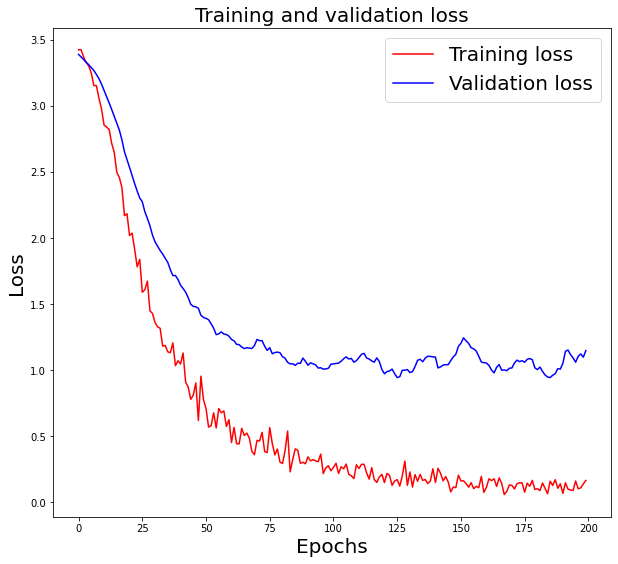

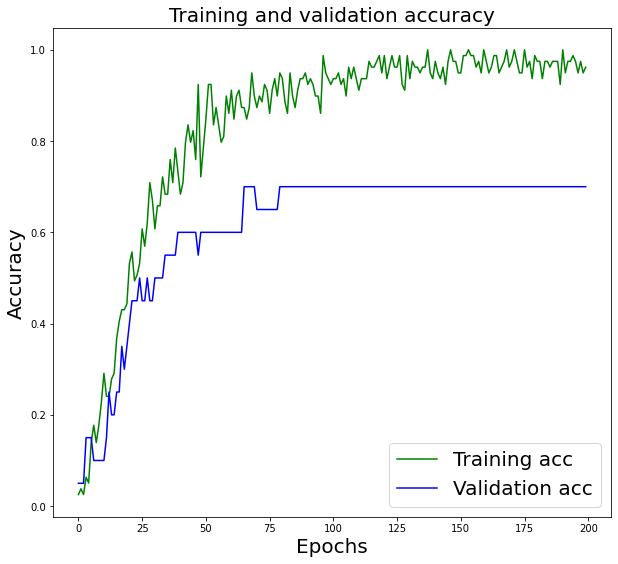

In [37]:
import matplotlib.pyplot as plt

history_dict = hist.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = hist.epoch

plt.figure(figsize=(10,9))
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss', size=20)
plt.legend(prop={'size': 20})
plt.show()

plt.figure(figsize=(10,9))
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Accuracy', size=20)
plt.legend(prop={'size': 20})
plt.show()